In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import bartlett
from scipy.stats import ttest_ind
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('insurance.csv', encoding_errors='ignore')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


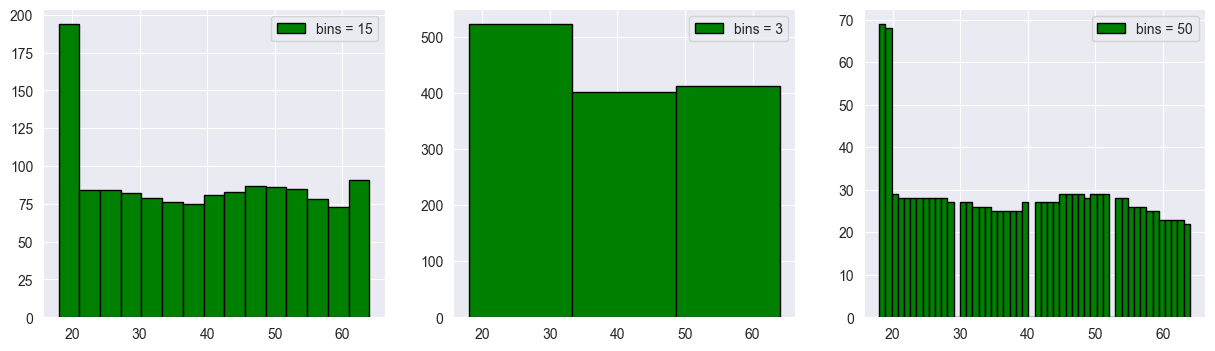

In [4]:
df = data.drop(['sex', 'bmi', 'smoker', 'region', 'charges', 'children'], axis=1).copy()
fig, ax = plt.subplots(1, 3, figsize=(15,4))
ax[0].hist(df, edgecolor='black', color='green', bins=15, label='bins = 15')
ax[0].legend()
ax[1].hist(df, edgecolor='black', color='green', bins=3, label='bins = 3')
ax[1].legend()
ax[2].hist(df, edgecolor='black', color='green', bins=50, label='bins = 50')
ax[2].legend()
plt.show()

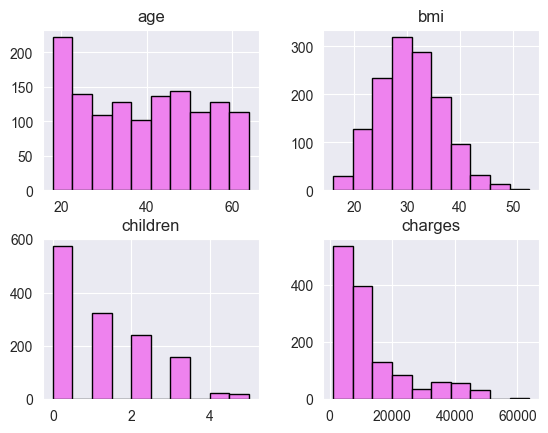

In [5]:
data.hist(edgecolor='black', color='violet')
plt.show()

Среднее = 30.663397
Moda =  ModeResult(mode=32.3, count=13)
Mediana = 30.400000


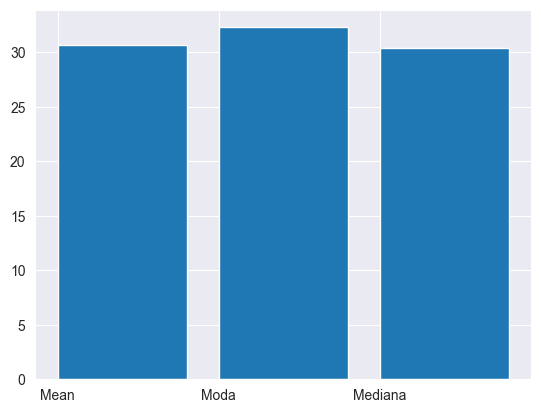

In [6]:
bmi = data.bmi
mean = np.mean(bmi)
moda = sts.mode(bmi)
med = np.median(bmi)
print('Среднее = %f'%mean)
print('Moda = ', moda)
print('Mediana = %f'%med)



s = [mean, moda[0], med]
x = range(len(s))
ax = plt.gca()
ax.bar(x, s, align='edge') # align='edge' - выравнивание по границе, а не по центру
ax.set_xticks(x)
ax.set_xticklabels(('Mean', 'Moda', 'Mediana'))
plt.show()

Среднее = 13270.422265
Moda =  ModeResult(mode=1639.5631, count=2)
Mediana = 9382.033000


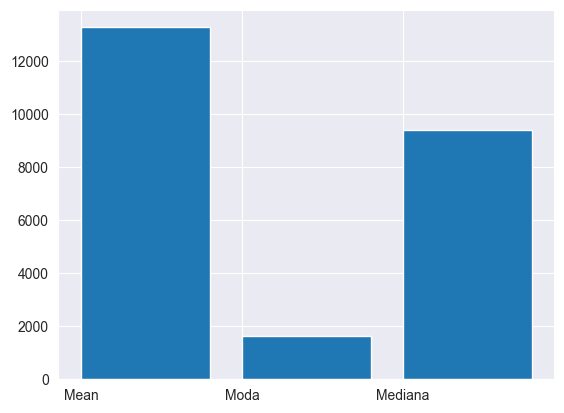

In [7]:
charges = data.charges
mean = np.mean(charges)
moda = sts.mode(charges)
med = np.median(charges)
print('Среднее = %f'%mean)
print('Moda = ', moda)
print('Mediana = %f'%med)

s = [mean, moda[0], med]
x = range(len(s))
ax = plt.gca()
ax.bar(x, s, align='edge') # align='edge' - выравнивание по границе, а не по центру
ax.set_xticks(x)
ax.set_xticklabels(('Mean', 'Moda', 'Mediana'))
plt.show()

In [8]:
ag = data.age
std = ag.std()
raz = ag.max() - ag.min()
q1 = np.percentile(ag, 25, interpolation='midpoint')
q2 = np.percentile(ag, 75, interpolation='midpoint')
iqr1 = q2 - q1
iqr2 = sts.iqr(ag, interpolation='midpoint')
result = [std, raz, iqr2]
print('Стандартное отклонение: ', std)
print('Размах: ', raz)
print('Межквартильный размах NumPy: ',iqr1)
print('Межквартильный размах scipy: ',iqr2)

Стандартное отклонение:  14.049960379216154
Размах:  46
Межквартильный размах NumPy:  24.0
Межквартильный размах scipy:  24.0


C:\Users\zudin\AppData\Local\Temp\ipykernel_5496\3904228651.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(ag, 25, interpolation='midpoint')
C:\Users\zudin\AppData\Local\Temp\ipykernel_5496\3904228651.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(ag, 75, interpolation='midpoint')


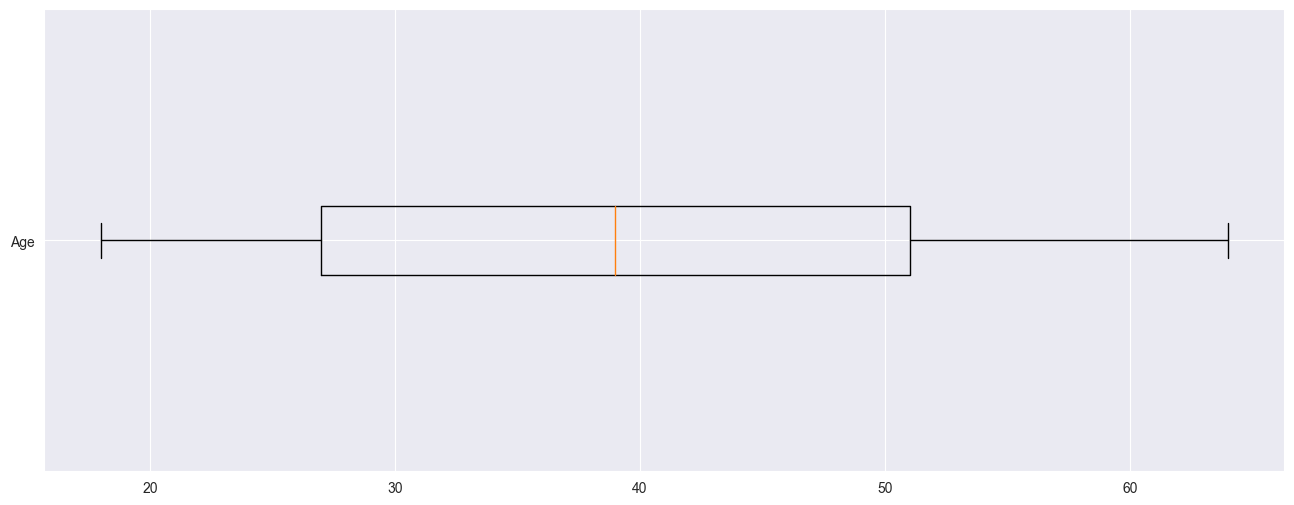

In [9]:
plt.figure(figsize=(16,6))
plt.boxplot([data['age']], labels=['Age'], vert=False)
plt.show()

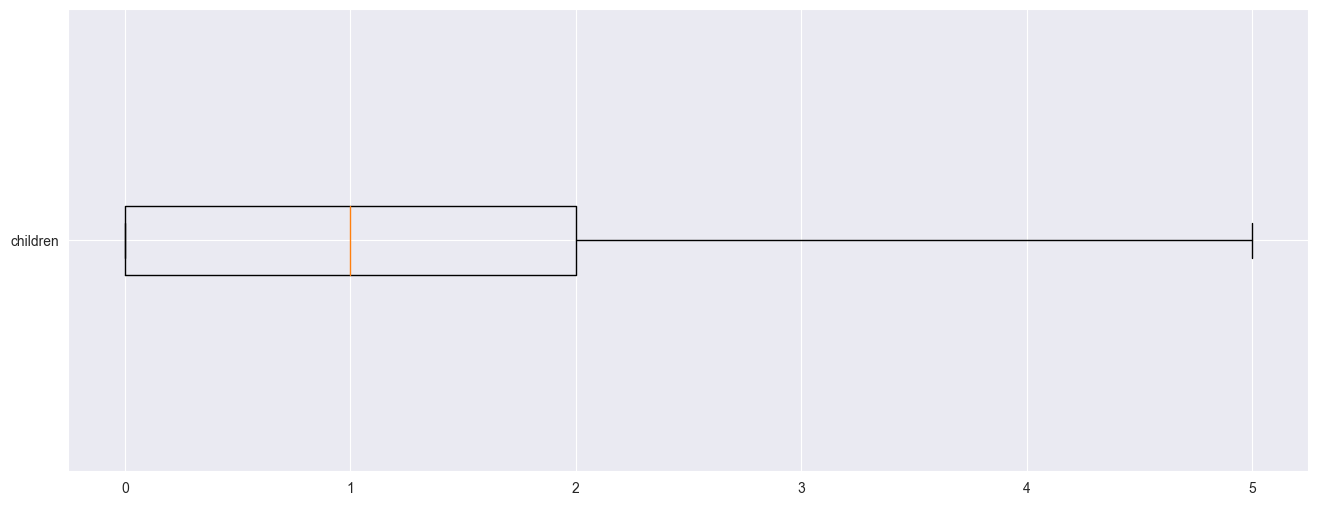

In [10]:
plt.figure(figsize=(16,6))
plt.boxplot([data['children']], labels=['children'], vert=False)
plt.show()

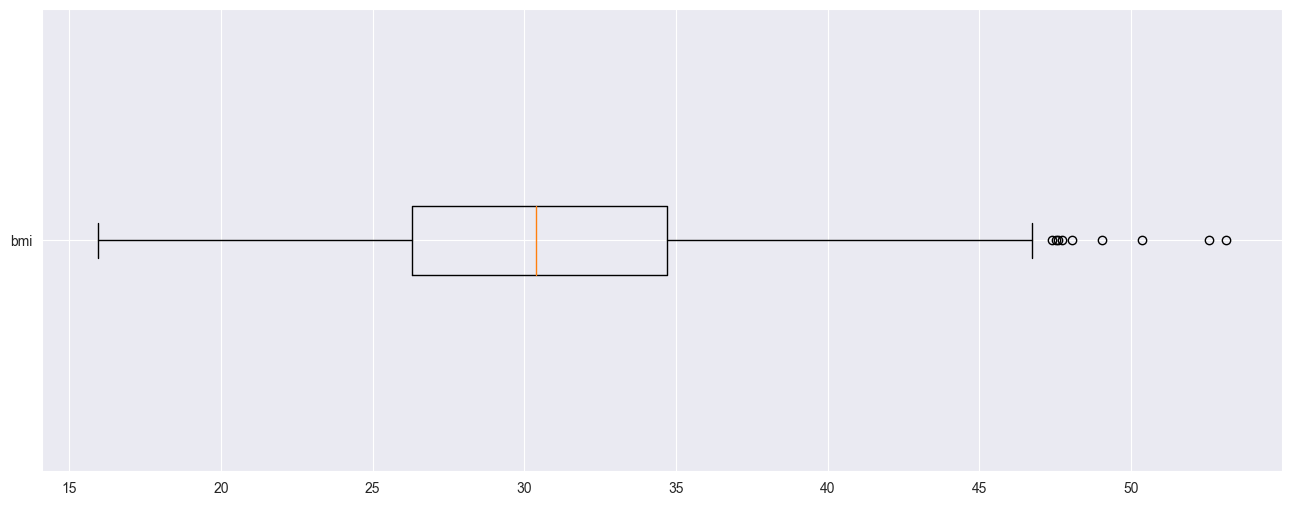

In [11]:
plt.figure(figsize=(16,6))
plt.boxplot([data['bmi']], labels=['bmi'], vert=False)
plt.show()

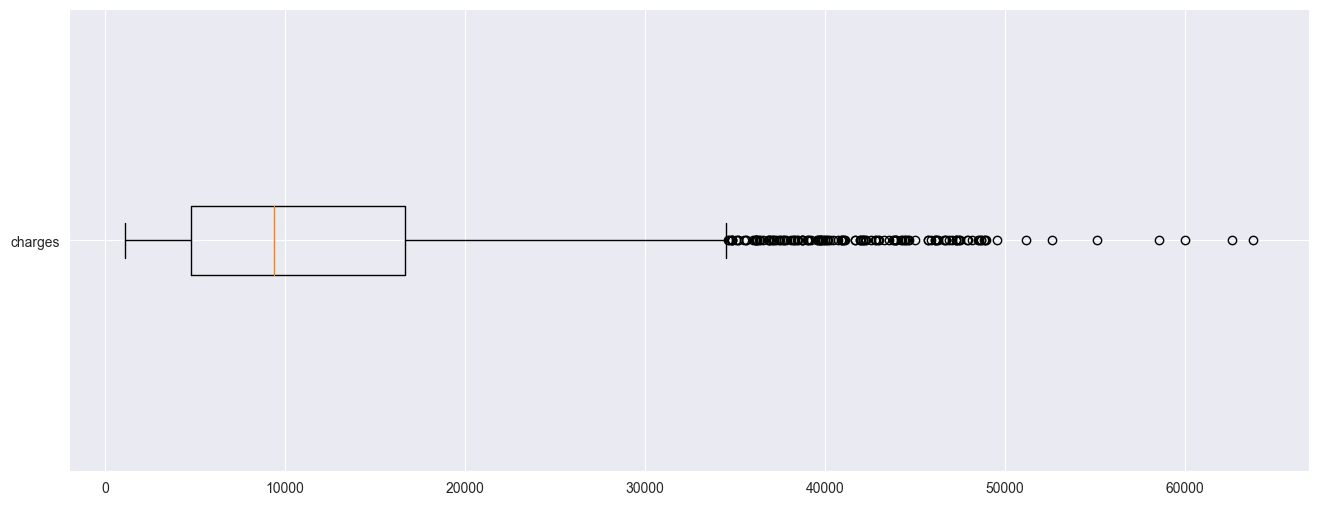

In [12]:
plt.figure(figsize=(16,6))
plt.boxplot([data['charges']], labels=['charges'], vert=False)
plt.show()

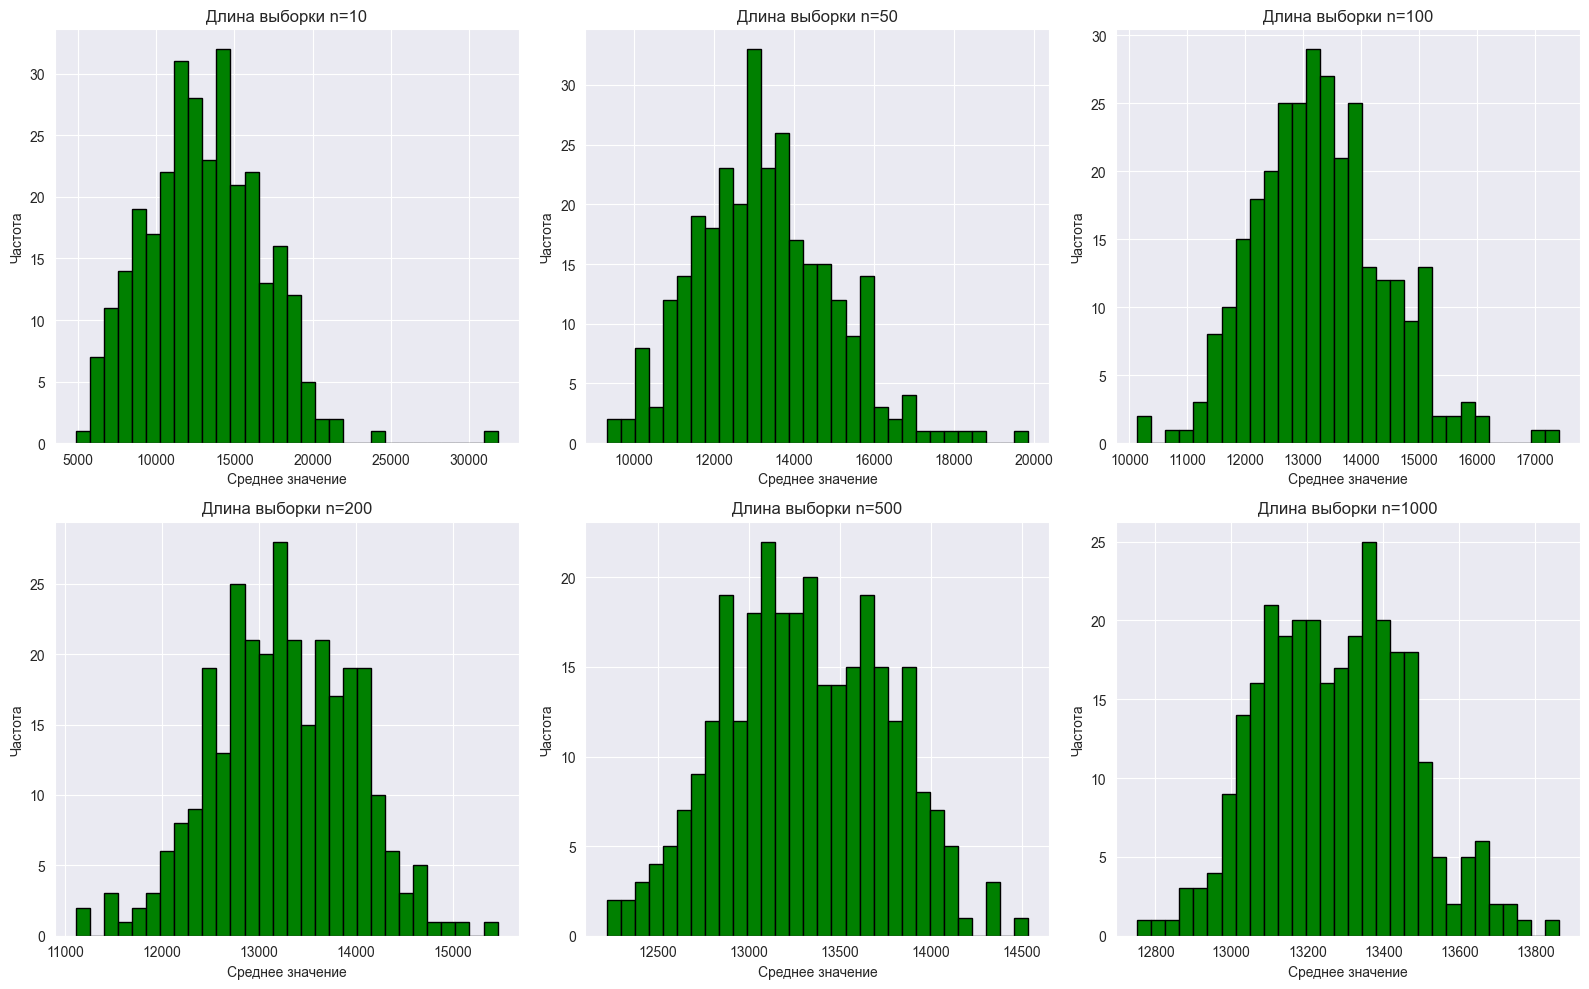

In [13]:
feature = 'charges'
samples = []

n = [10, 50, 100, 200, 500, 1000]
num_samples = 300

for length in n:
    sample_means = []
    for i in range(num_samples):
        sample = np.random.choice(data[feature], size=length, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    samples.append(sample_means)

plt.figure(figsize=(16, 10))

for i, length in enumerate(n):
    plt.subplot(2, 3, i+1)
    plt.hist(samples[i], bins=30, color='green', edgecolor='black')
    plt.title(f'Длина выборки n={length}')
    plt.xlabel('Среднее значение')
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

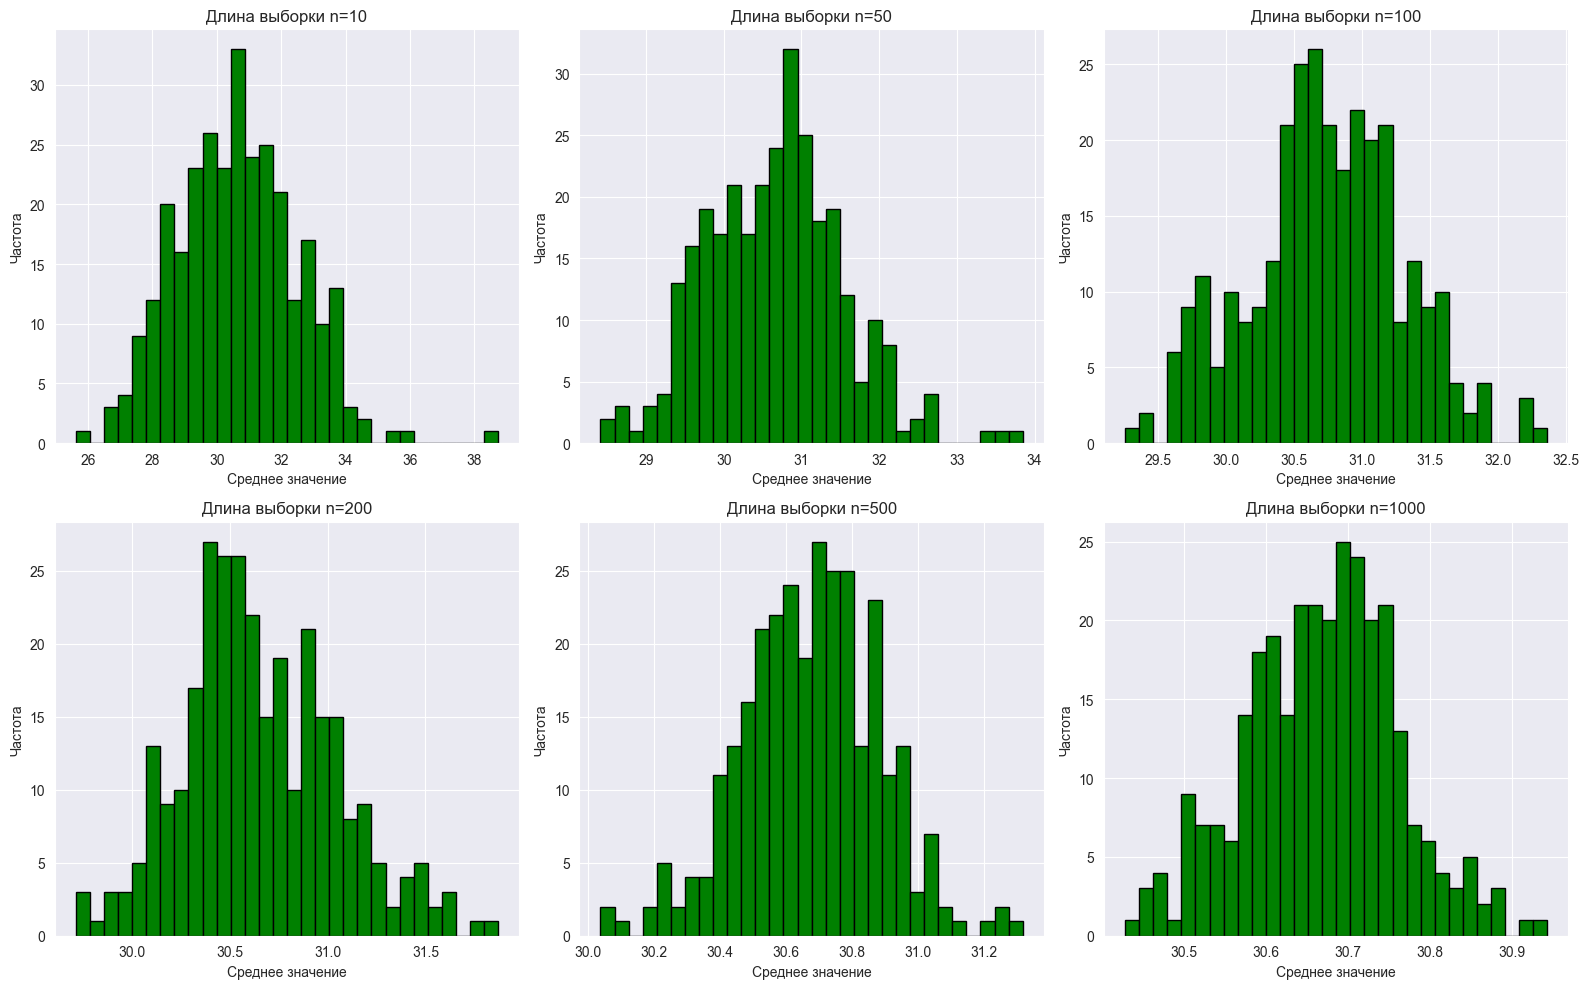

In [14]:
feature = 'bmi'
samples = []

n = [10, 50, 100, 200, 500, 1000]
num_samples = 300

for length in n:
    sample_means = []
    for i in range(num_samples):
        sample = np.random.choice(data[feature], size=length, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    samples.append(sample_means)

plt.figure(figsize=(16, 10))

for i, length in enumerate(n):
    plt.subplot(2, 3, i+1)
    plt.hist(samples[i], bins=30, color='green', edgecolor='black')
    plt.title(f'Длина выборки n={length}')
    plt.xlabel('Среднее значение')
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [15]:
selected_features = ['charges', 'bmi']

confidence_levels = [0.95, 0.99]

confidence_intervals = {}

for feature in selected_features:
    confidence_intervals[feature] = {}
    for confidence_level in confidence_levels:
        data_feature = data[feature]
        n = len(data_feature)
        mean = np.mean(data_feature)
        std = np.std(data_feature)

        z_score = sts.norm.ppf((1 + confidence_level) / 2)

        margin_of_error = z_score * (std / np.sqrt(n))

        lower_bound = mean - margin_of_error
        upper_bound = mean + margin_of_error

        confidence_intervals[feature][confidence_level] = (lower_bound, upper_bound)

for feature, intervals in confidence_intervals.items():
    print(f"Доверительные интервалы для {feature}:")
    for confidence_level, interval in intervals.items():
        print(f"Для {confidence_level * 100}% доверительный интервал: ({interval[0]}, {interval[1]})")
    print()

Доверительные интервалы для charges:
Для 95.0% доверительный интервал: (12621.784504975403, 13919.06002530711)
Для 99.0% доверительный интервал: (12417.967749036661, 14122.876781245852)

Доверительные интервалы для bmi:
Для 95.0% доверительный интервал: (30.336765099698106, 30.99002862227499)
Для 99.0% доверительный интервал: (30.234129961781765, 31.092663760191332)



KS-тест для bmi:
KS-статистика: 0.026099881197044872
p-значение: 0.3162798242838005
Распределение bmi можно считать нормальным (не отвергаем H0)


<Figure size 1200x800 with 0 Axes>

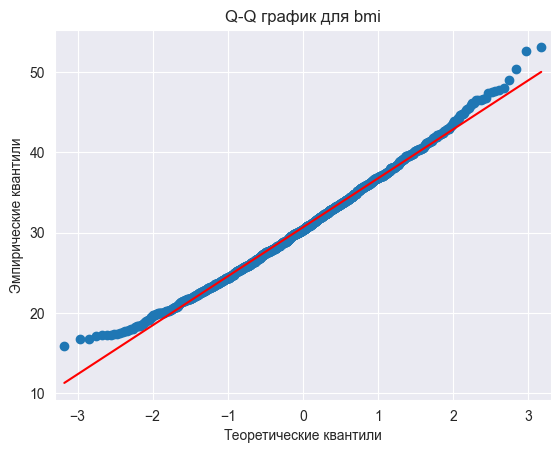

KS-тест для charges:
KS-статистика: 0.18846450965981876
p-значение: 4.381949677777398e-42
Распределение charges не является нормальным (отвергаем H0)


<Figure size 1200x800 with 0 Axes>

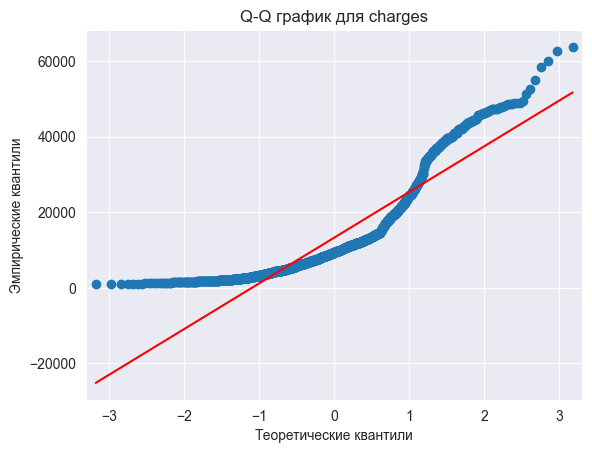

In [16]:
selected_features = ['bmi', 'charges']

alpha = 0.05

for feature in selected_features:
    ks_statistic, ks_p_value = sts.kstest(data[feature], 'norm', (data[feature].mean(), data[feature].std()))

    plt.figure(figsize=(12, 8))
    sm.qqplot(data[feature], line='s')
    plt.title(f'Q-Q график для {feature}')
    plt.xlabel('Теоретические квантили')
    plt.ylabel('Эмпирические квантили')

    print(f'KS-тест для {feature}:')
    print(f'KS-статистика: {ks_statistic}')
    print(f'p-значение: {ks_p_value}')

    if ks_p_value > alpha:
        print(f'Распределение {feature} можно считать нормальным (не отвергаем H0)')
    else:
        print(f'Распределение {feature} не является нормальным (отвергаем H0)')

    plt.show()

In [17]:
data2 = pd.read_csv('ECDCCases.csv')
data2

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
...,...,...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [24]:
missing_values = data2.isnull().sum()
missing_percentages = (missing_values / len(data)) * 100

print("Количество пропущенных значений в процентах:")
print(missing_percentages)
print()

# Удаление двух признаков с наибольшим количеством пропущенных значений
columns_to_drop = missing_values.nlargest(2).index
data_new = data2.drop(columns_to_drop, axis=1)

# Заполнение пропусков для категориального признака значением "other"
categorical_columns = data_new.select_dtypes(include='object').columns
data_new[categorical_columns] = data_new[categorical_columns].fillna('other')

# Заполнение пропусков для числового признака медианным значением
numeric_columns = data_new.select_dtypes(include=['int64', 'float64']).columns
data_new[numeric_columns] = data_new[numeric_columns].fillna(data_new[numeric_columns].median())

# Проверка наличия пропущенных значений после обработки
print("Проверка наличия пропущенных значений:")
print(data_new.isnull().sum().sum())

Количество пропущенных значений в процентах:
dateRep                                                         0.000000
day                                                             0.000000
month                                                           0.000000
year                                                            0.000000
cases                                                           0.000000
deaths                                                          0.000000
countriesAndTerritories                                         0.000000
geoId                                                          20.553064
countryterritoryCode                                            9.192825
popData2019                                                     9.192825
continentExp                                                    0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    215.171898
dtype: float64

Проверка наличия пропущенных значений:
0


In [25]:
data_des = data_new.describe()
data_des

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


In [26]:
numeric_features = data_new.select_dtypes(include=['int', 'float'])

outliers = {}
for feature in numeric_features.columns:
    Q1 = data_des.loc['25%'][feature]
    Q3 = data_des.loc['75%'][feature]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    feature_outliers = data_new[(data_new[feature] < lower_bound) | (data_new[feature] > upper_bound)]
    outliers[feature] = feature_outliers

for feature, outlier_df in outliers.items():
    print(f"Выбросы для признака '{feature}':")
    print(outlier_df)

Выбросы для признака 'day':
Empty DataFrame
Columns: [dateRep, day, month, year, cases, deaths, countriesAndTerritories, countryterritoryCode, popData2019, continentExp]
Index: []
Выбросы для признака 'month':
Empty DataFrame
Columns: [dateRep, day, month, year, cases, deaths, countriesAndTerritories, countryterritoryCode, popData2019, continentExp]
Index: []
Выбросы для признака 'year':
          dateRep  day  month  year  cases  deaths   countriesAndTerritories   
341    31/12/2019   31     12  2019      0       0               Afghanistan  \
967    31/12/2019   31     12  2019      0       0                   Algeria   
2668   31/12/2019   31     12  2019      0       0                   Armenia   
3285   31/12/2019   31     12  2019      0       0                 Australia   
3635   31/12/2019   31     12  2019      0       0                   Austria   
...           ...  ...    ...   ...    ...     ...                       ...   
55850  31/12/2019   31     12  2019      0       

In [29]:
high_death = data_new[data_new['deaths'] > 3000]
num_days_with_high_death = len(high_death)
print(f"Количество дней с количеством смертей в день более 3000: {num_days_with_high_death}")
high_death

Количество дней с количеством смертей в день более 3000: 11


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
2118,02/10/2020,2,10,2020,14001,3351,Argentina,ARG,44780675.0,America
16908,07/09/2020,7,9,2020,-8261,3800,Ecuador,ECU,17373657.0,America
37038,09/10/2020,9,10,2020,4936,3013,Mexico,MEX,127575529.0,America
44888,14/08/2020,14,8,2020,9441,3935,Peru,PER,32510462.0,America
44909,24/07/2020,24,7,2020,4546,3887,Peru,PER,32510462.0,America
59007,12/12/2020,12,12,2020,234633,3343,United_States_of_America,USA,329064917.0,America
59009,10/12/2020,10,12,2020,220025,3124,United_States_of_America,USA,329064917.0,America
59016,03/12/2020,3,12,2020,203311,3190,United_States_of_America,USA,329064917.0,America
59239,24/04/2020,24,4,2020,26543,3179,United_States_of_America,USA,329064917.0,America
59245,18/04/2020,18,4,2020,30833,3770,United_States_of_America,USA,329064917.0,America


In [30]:
data_new = data_new.drop_duplicates()
data_new

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
5,10/12/2020,10,12,2020,202,16,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


In [31]:
bmi = pd.read_csv('bmi.csv')
bmi

,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest
...,...,...
645,20.600,southwest
646,38.600,southwest
647,33.400,southwest
648,44.700,southwest


In [33]:
northwest_bmi = bmi[bmi['region'] == 'northwest']['bmi']
southwest_bmi = bmi[bmi['region'] == 'southwest']['bmi']

In [34]:
northwest_bmi

0      22.705
1      28.880
2      27.740
3      25.840
4      28.025
        ...  
320    26.315
321    31.065
322    25.935
323    30.970
324    29.070
Name: bmi, Length: 325, dtype: float64

In [35]:
southwest_bmi

325    27.9
326    34.4
327    24.6
328    40.3
329    35.3
       ... 
645    20.6
646    38.6
647    33.4
648    44.7
649    25.8
Name: bmi, Length: 325, dtype: float64

In [38]:
p_value_nw = shapiro(northwest_bmi)
p_value_sw = shapiro(southwest_bmi)

print(f'p-value для выборки из northwest: {p_value_nw}')
print(f'p-value для выборки из southwest: {p_value_sw}')

p-value для выборки из northwest: ShapiroResult(statistic=0.9954646825790405, pvalue=0.4655335247516632)
p-value для выборки из southwest: ShapiroResult(statistic=0.9949268698692322, pvalue=0.3629520535469055)


In [40]:
p_value_bartlett = bartlett(northwest_bmi, southwest_bmi)

print(f'p-value критерия Бартлетта: {p_value_bartlett}')

p-value критерия Бартлетта: BartlettResult(statistic=3.4000745256459286, pvalue=0.06519347353581818)


In [41]:
t_stat, p_value = ttest_ind(northwest_bmi, southwest_bmi)

print(f'Значение t-статистики: {t_stat}')
print(f'p-value t-теста: {p_value}')

Значение t-статистики: -3.2844171500398582
p-value t-теста: 0.001076958496307695


In [42]:
expected_counts = [100] * 6

observed_counts = [97, 98, 109, 95, 97, 104]

chi_square_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f'Значение статистики Хи-квадрат: {chi_square_stat}')
print(f'p-value: {p_value}')

Значение статистики Хи-квадрат: 1.44
p-value: 0.9198882077437889


In [43]:
data = pd.DataFrame({'Женат': [89, 17, 11, 43, 22, 1],
                     'Гражданский брак': [80, 22, 20, 35, 6, 4],
                     'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]})
data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает', 'На домохозяйстве', 'На пенсии', 'Учёба']

chi2_stat, p_value, dof, expected = chi2_contingency(data)

print(f'Значение статистики Хи-квадрат: {chi2_stat}')
print(f'p-value: {p_value}')
print(f'Степени свободы: {dof}')

Значение статистики Хи-квадрат: 122.29654948595365
p-value: 1.7291616900960234e-21
Степени свободы: 10
